# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 05 апреля 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Решение***

$$ X - (n \times k), y - (n \times 1), w - (k \times 1)$$

$$L(w) =  \frac{1}{n}\left[\sum_{i=1}^n (y_i - \langle\,x_i,w\rangle) ^ 2 \right] + \frac{1}{C}\sum_{j=1}^{n}w_j^2 = \frac{1}{n}(y - Xw)^T(y - Xw) + \frac{1}{C} w^Tw $$

$$ \nabla_wL(w) = \frac{1}{n}\left(2X^TXw - 2X^Ty\right) + \frac{2}{C} w$$


$$ w_{new} = w_{old} - \alpha \nabla_wL(w_{old}) = w_{old} - 2\alpha \left(\frac{1}{n}X^T(Xw_{old} - y) + \frac{1}{C}w_{old}\right) , \alpha - \text{learning rate}$$


Интуитивно, градиент - это вектор признаков умноженный на ошибку

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Решение***

$$ X - (n \times k), y - (n \times 1), w - (k \times 1)$$

$$L(w) =  -\frac{1}{n}\left[\sum_{i=1}^n y_i \log \sigma( \langle\,x_i,w\rangle ) + ( 1 - y_i) \log (1 - \sigma( \langle\,x_i,w\rangle )) \right] + \frac{1}{C}\sum_{j=1}^{n}w_j^2$$

$$ \nabla_wL(w) = \frac{1}{n}X^T\left(\sigma( Xw ) - y\right) + \frac{2}{C} w$$


$$ w_{new} = w_{old} - \alpha \nabla_wL(w_{old}) = w_{old} - \alpha \left(\frac{1}{n}X^T\left(\sigma( Xw_{old}) - y\right) + \frac{2}{C}w_{old}\right) , \alpha - \text{learning rate}$$


Интуитивно, как и в случае линейной регрессии, градиент - это вектор признаков умноженный на ошибку.

Формулы градиентов логистической и линейной регрессий очень похожи между собой, отличия только в коэффициенте и в том, что в логистической регрессии берется сигмоида от $Xw$. Но мы можем получить единую формулу, заменив $Xw$ на $a(x, w)$ в линейной регрессии и $\sigma(Xw)$ на $a(x, w)$ в логистической:
$$ \nabla_wL(w) = \frac{1}{n}X^T\left(a(x, w) - y)\right) $$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Решение***

$$ \nabla_wL(w) = \frac{1}{n}\left(2X^TXw - 2X^Ty\right) + \frac{2}{C} w$$
$$ \Delta_wL(w) = \frac{2}{n}X^TX $$

Покажем, что гессиан положительно определен:
1) $X^TX$ неотрицательно определен, т.к. для $\forall a: aX^TXa^T = (Xa^T)^T(Xa^T) = \|Xa^T\|_2 \geq 0$ \
2) Т.к. ранг полный, то $Xa^T = 0 \Leftrightarrow x = 0$, то есть для $\forall a \neq 0$   $aX^TXa^T > 0$

$\Rightarrow$ выполнено достаточное условие минимума, то есть $w$ - точка минимума

Точное решение для модели с  $L2$  регуляризацией: 
$$\nabla_wL(w) = 0 \Rightarrow w = \left(X^TX + \alpha E\right)^{-1}X^Ty$$

Из-за $L2$  регуляризации к каждой строке на место диагонального элемента прибавляется коэффициент $\alpha$, что позволяет увеличить собственные значения матрицы, т.к. в случае линейно зависимых признаков собственные значения матрицы $X^TX$ будут почти равны $0$.

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Решение***
$$\frac{\partial E(L | x_i)}{\partial a(x_i)} = - \frac{p(y_i = 1 |x_i )}{a(x_i)}  + \frac{p(y_i = 0 | x_i)}{( 1 - a(x_i))} = 0$$


$$ p(y_i = 1 |x_i ) = a(x_i)(p(y_i = 0 | x_i) + p(y_i = 1 |x_i )) $$


$$ a(x_i) = p(y_i = 1 |x_i ) - \text{точка экстремума} $$

Покажем, что она является минимумом:

$$\frac{\partial^2E(L | x_i)}{\partial a(x_i)^2} = \frac{p(y_i = 1 |x_i )}{a(x_i)^2} + \frac{p(y_i = 0 | x_i)}{( 1 - a(x_i))^2} > 0$$ 

$\Rightarrow a(x_i) = p(y_i = 1 |x_i)$ - минимум

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Решение***

$w_0$ вводится для того, чтобы определить сдвиг разделяющей гиперплоскости относительно начала координат. Не имеет смысла штрафовать модель за это смещение.

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [6]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """

    X_ = X[np.random.permutation(X.shape[0])] if shuffle else X
    y_ = y[np.random.permutation(y.shape[0])] if shuffle else y
    for i in range(0, X_.shape[0] // batch_size, batch_size):
        X_batch = X_[i:i + batch_size]
        y_batch = y_[i:i + batch_size]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
# my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1)

In [7]:
# %%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """

    sigm_value_x = 1 / (1 + np.exp(-x))
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin


class MySGDClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg'):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """

        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter': [], 'loss': []}
        self.model_type = model_type

    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if self.model_type == 'lin_reg':
            loss = np.mean((X_batch @ self.weights - y_batch) ** 2)
        if self.model_type == 'log_reg':
            p = sigmoid(X_batch @ self.weights)
            if np.isclose(p, 0).any() or np.isclose(p, 1).any():
                loss = np.inf
                return loss
            loss = -np.mean(y_batch * np.log(p) + (1 - y_batch) * np.log(1 - p))
        loss += 1 / self.C * np.sum(self.weights[1:] ** 2)
        return loss

    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if self.model_type == 'lin_reg':
            loss_grad = 2 * (X_batch.T @ (X_batch @ self.weights - y_batch)) / X_batch.shape[0]
        if self.model_type == 'log_reg':
            loss_grad = (X_batch.T @ (sigmoid(X_batch @ self.weights) - y_batch)) / X_batch.shape[0]
        loss_grad[1:] += 2 / self.C * self.weights[1:]
        return loss_grad

    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """

        self.weights -= self.alpha * np.mean(new_grad, axis=1, keepdims=True)

    def fit(self, X, y, batch_size=20):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''

        X = np.hstack((np.ones((X.shape[0], 1)), X))
        # Нужно инициализровать случайно веса

        self.weights = np.random.uniform(size=(X.shape[1], 1))
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, batch_size=batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)

        return self

    def predict(self, X, threshold=0.5):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''

        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        if self.model_type == 'lin_reg':
            y_hat = X @ self.weights
        if self.model_type == 'log_reg':
            y_hat = sigmoid(X @ self.weights)
        return (y_hat > threshold).astype(int)

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [8]:
def plot_decision_boundary(clf):
    ## Your code Here
    w = clf.weights
    print(f"Model:{clf.model_type}", *clf.weights)
    x = np.arange(-4, 8)
    plt.plot(x, -(w[0] + w[1] * x) / w[2])

Model:lin_reg [0.44396647] [-0.08019625] [0.1090647]
Model:log_reg [0.0401682] [-0.00953394] [0.00928018]


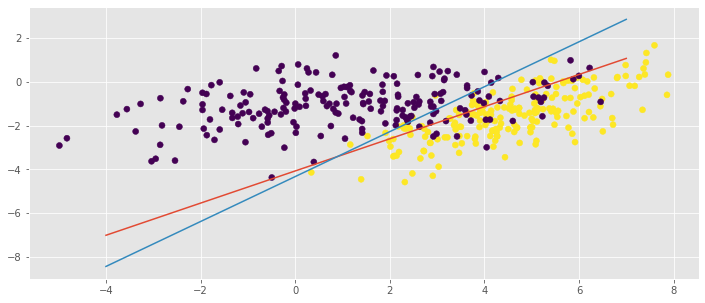

In [9]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

clf = MySGDClassifier(batch_generator, C=1, alpha=0.02, max_epoch=10, model_type='lin_reg')
clf.fit(X, y, batch_size=1)
plot_decision_boundary(clf)

clf = MySGDClassifier(batch_generator, C=1, alpha=0.001, max_epoch=10, model_type='log_reg')
clf.fit(X, y, batch_size=1)
plot_decision_boundary(clf)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()


Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [10]:
from sklearn.datasets import make_classification

In [11]:
X, y = make_classification(n_samples=100000, n_features=10,
                           n_informative=4, n_redundant=0,
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

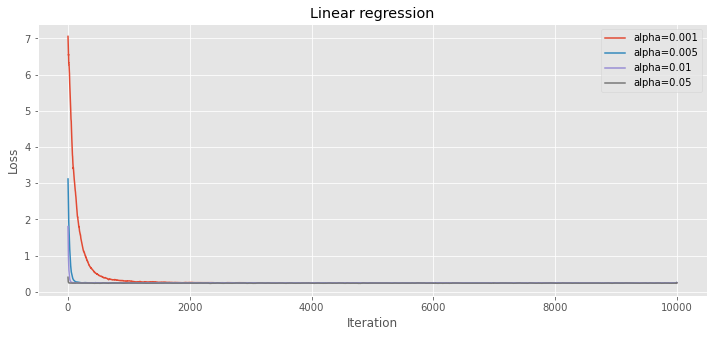

In [12]:
N = 50
alphas = [0.001, 0.005, 0.01, 0.05]
batch_size = 10

for alpha in alphas:
    clf = MySGDClassifier(batch_generator, alpha=alpha, model_type='lin_reg')
    clf.fit(X, y, batch_size)
    losses = []
    for i in range(0, len(clf.errors_log['loss']), 1):
        losses.append(np.mean(clf.errors_log['loss'][i:i + N]))

    plt.plot(np.arange(0, len(clf.errors_log['loss']), 1), losses, label=f'alpha={alpha}')

plt.legend()
plt.title('Linear regression')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

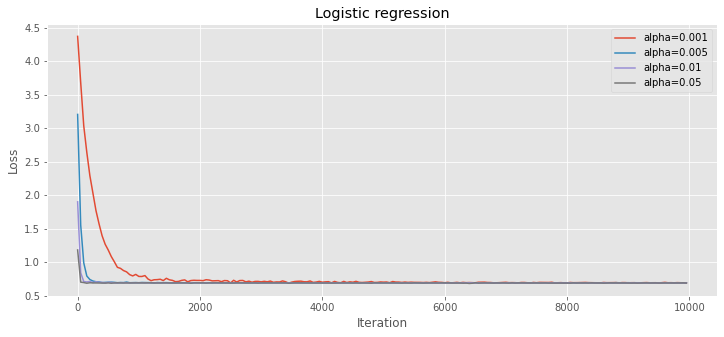

In [13]:
N = 50
alphas = [0.001, 0.005, 0.01, 0.05]
batch_size = 10

for alpha in alphas:
    clf = MySGDClassifier(batch_generator, alpha=alpha, model_type='log_reg')
    clf.fit(X, y, batch_size)
    losses = []
    for i in range(0, len(clf.errors_log['loss']), N):
        losses.append(np.mean(clf.errors_log['loss'][i:i + N]))

    plt.plot(np.arange(0, len(clf.errors_log['loss']), N), losses, label=f'alpha={alpha}')

plt.legend()
plt.title('Logistic regression')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

При больших alpha функция потерь сходится быстрее, но при приближении к минимуму из-за большого шага можем так и не достичь этот минимум. Поэтому лучше всего в начале выбирать шаг побольше, а затем уменьшать его от эпохи к эпохе. 

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

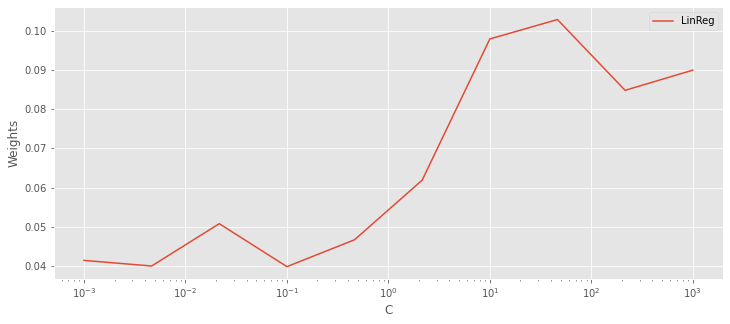

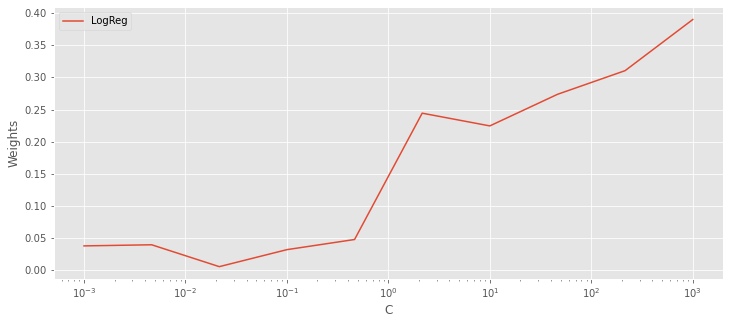

In [14]:
C = np.logspace(3, -3, 10)
batch_size = 10

lin_weights = []
log_weights = []

for elem in C:
    clf = MySGDClassifier(batch_generator, C=elem, alpha=0.0001, model_type='lin_reg')
    clf.fit(X, y, batch_size)
    lin_weights.append(np.mean(clf.weights))

    clf = MySGDClassifier(batch_generator, C=elem, alpha=0.0001, model_type='log_reg')
    clf.fit(X, y, batch_size)
    log_weights.append(np.mean(clf.weights))

plt.plot(C, lin_weights, label='LinReg')
plt.legend()
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Weights')
plt.show()

plt.plot(C, log_weights, label='LogReg')
plt.legend()
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Weights')
plt.show()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

Уменьшение закономерное уменьшению С. Только веса очень близки нулю при малых С.

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [15]:
doc_to_title = {}
with open('docs_titles.tsv', encoding='utf-8') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print(len(doc_to_title))


28026


In [16]:
import pandas as pd

train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [17]:
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15])
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print(X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [18]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
from sklearn.model_selection import GroupKFold

gkfold = GroupKFold(n_splits=10)

results = {}
for C in [0.01, 0.05, 0.1, 0.5, 1, 10, 50, 100]:
    for alpha in [0.001, 0.005, 0.01, 0.05]:
        for max_epoch in range(5, 26, 5):
            val_scores = []
            for train, test in gkfold.split(X_train, groups=groups_train):
                clf = MySGDClassifier(batch_generator, max_epoch=max_epoch, C=C,
                                      alpha=alpha, model_type='log_reg')
                clf.fit(X_train[train], y_train[train])
                y_pred = clf.predict(X_train[test])
                val_scores.append(f1_score(y_train[test], y_pred))
            results[(C, alpha, max_epoch)] = np.mean(val_scores)
            print(f'C={C}, alpha={alpha:.3f}, max_epoch={max_epoch}, \
                  score={np.mean(val_scores):.4f}')

C=0.01, alpha=0.001, max_epoch=5,                   score=0.4368
C=0.01, alpha=0.001, max_epoch=10,                   score=0.4368
C=0.01, alpha=0.001, max_epoch=15,                   score=0.4368
C=0.01, alpha=0.001, max_epoch=20,                   score=0.3688
C=0.01, alpha=0.001, max_epoch=25,                   score=0.2350
C=0.01, alpha=0.005, max_epoch=5,                   score=0.4368
C=0.01, alpha=0.005, max_epoch=10,                   score=0.2203
C=0.01, alpha=0.005, max_epoch=15,                   score=0.2277
C=0.01, alpha=0.005, max_epoch=20,                   score=0.0615
C=0.01, alpha=0.005, max_epoch=25,                   score=0.0000
C=0.01, alpha=0.010, max_epoch=5,                   score=0.1828
C=0.01, alpha=0.010, max_epoch=10,                   score=0.5851
C=0.01, alpha=0.010, max_epoch=15,                   score=0.1802
C=0.01, alpha=0.010, max_epoch=20,                   score=0.5867
C=0.01, alpha=0.010, max_epoch=25,                   score=0.1797
C=0.01, alpha

C=50, alpha=0.005, max_epoch=15,                   score=0.4499
C=50, alpha=0.005, max_epoch=20,                   score=0.4132
C=50, alpha=0.005, max_epoch=25,                   score=0.3337
C=50, alpha=0.010, max_epoch=5,                   score=0.5484
C=50, alpha=0.010, max_epoch=10,                   score=0.3454
C=50, alpha=0.010, max_epoch=15,                   score=0.1876
C=50, alpha=0.010, max_epoch=20,                   score=0.0762
C=50, alpha=0.010, max_epoch=25,                   score=0.0116
C=50, alpha=0.050, max_epoch=5,                   score=0.0288
C=50, alpha=0.050, max_epoch=10,                   score=0.0007
C=50, alpha=0.050, max_epoch=15,                   score=0.0000
C=50, alpha=0.050, max_epoch=20,                   score=0.0000
C=50, alpha=0.050, max_epoch=25,                   score=0.0000
C=100, alpha=0.001, max_epoch=5,                   score=0.5857
C=100, alpha=0.001, max_epoch=10,                   score=0.5791
C=100, alpha=0.001, max_epoch=15,        

In [23]:
best = sorted(results.items(), key=lambda x: x[1])[::-1][:10]
best

[((50, 0.001, 15), 0.5880584775217824),
 ((0.01, 0.01, 20), 0.5866863034523722),
 ((0.01, 0.05, 10), 0.586345888294436),
 ((0.05, 0.05, 20), 0.5862969994929107),
 ((0.05, 0.05, 10), 0.5862192332620269),
 ((100, 0.001, 15), 0.5860022384237269),
 ((100, 0.001, 5), 0.5856882770391896),
 ((50, 0.001, 20), 0.5854734519182716),
 ((10, 0.005, 5), 0.5852901128144734),
 ((0.01, 0.01, 10), 0.5850646248123106)]

In [26]:
best_params = {'C': 0.01, 'alpha': 0.01, 'max_epoch': 20}

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [27]:
gkfold = GroupKFold(n_splits=15)

thresholds = {}
clf = MySGDClassifier(batch_generator, **best_params, model_type='log_reg')
clf.fit(X_train[train], y_train[train])
for threshold in np.arange(0, 1, 0.01):
    val_scores = []
    for train, test in gkfold.split(X_train, groups=groups_train):
        y_pred = clf.predict(X_train[test], threshold)
        val_scores.append(f1_score(y_train[test], y_pred))
    thresholds[threshold] = np.mean(val_scores)
    print(f'threshold={threshold:.2f}, score={np.mean(val_scores):.4f}')


threshold=0.00, score=0.4411
threshold=0.01, score=0.5941
threshold=0.02, score=0.5949
threshold=0.03, score=0.5932
threshold=0.04, score=0.5928
threshold=0.05, score=0.5922
threshold=0.06, score=0.5915
threshold=0.07, score=0.5936
threshold=0.08, score=0.5926
threshold=0.09, score=0.5928
threshold=0.10, score=0.5929
threshold=0.11, score=0.5926
threshold=0.12, score=0.5926
threshold=0.13, score=0.5926
threshold=0.14, score=0.5937
threshold=0.15, score=0.5938
threshold=0.16, score=0.5942
threshold=0.17, score=0.5947
threshold=0.18, score=0.5948
threshold=0.19, score=0.5949
threshold=0.20, score=0.5946
threshold=0.21, score=0.5947
threshold=0.22, score=0.5947
threshold=0.23, score=0.5950
threshold=0.24, score=0.5958
threshold=0.25, score=0.5956
threshold=0.26, score=0.5959
threshold=0.27, score=0.5957
threshold=0.28, score=0.5957
threshold=0.29, score=0.5958
threshold=0.30, score=0.5959
threshold=0.31, score=0.5955
threshold=0.32, score=0.5954
threshold=0.33, score=0.5952
threshold=0.34

In [28]:
best10 = sorted(thresholds.items(), key=lambda x: x[1])[::-1][:10]
best10

[(0.75, 0.5998024392226622),
 (0.76, 0.5996360766167207),
 (0.77, 0.5994872688719859),
 (0.74, 0.5994708363082446),
 (0.78, 0.5994431399425789),
 (0.8, 0.599330765145135),
 (0.79, 0.599204146231887),
 (0.85, 0.5986742935538752),
 (0.84, 0.5986742935538752),
 (0.81, 0.5985853279595389)]

In [29]:
best_threshold = best10[0][0]

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

In [30]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15])
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print(X_test.shape, groups_test.shape)

(16627, 15) (16627,)


In [31]:
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

In [32]:
clf = MySGDClassifier(batch_generator, **best_params, model_type='log_reg')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test, best_threshold)
np.unique(y_pred, return_counts=True)

(array([0, 1]), array([10631,  5996], dtype=int64))

In [33]:
subm = pd.read_csv('sample_submission.csv')
subm.target = y_pred

In [34]:
subm.to_csv('submission.csv', index=False)

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***